In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Some constant uncertainties
u_deflection = 0.4 / 100 # in meters
u_voltage = 0.5 # in volts
u_l = 0.01 # in meters
u_d_mirror_wire = 0.001 # in meters
u_d_wire_offset = 0.0001 # in meters

# Some constants
l = 2.02 # in meters
d_mirror_wire = 0.2 # in meters, the distance between the mirror and the wires
d_wire_offset = 0.007 # in meters, original distance between the wires

In [3]:
# curvefit models
def linear_model(x, a, b):
    return a * x + b

def quadratic_model(x, a, b):
    return a * x**2 + b

In [4]:
# recalibrating the current from the voltage
voltage_c, current_c = np.loadtxt('calibrating_current.txt', skiprows=1, unpack=True)

# use curvefit to get the clibration ratio and uncertainties
c_p_opt, c_p_cov = curve_fit(linear_model, voltage_c, current_c, 
                             sigma=np.array([u_voltage] * len(voltage_c)), absolute_sigma=True)

calibration_constant = c_p_opt[0]
c_b = c_p_opt[1]
c_pvar = np.diag(c_p_cov)
c_stdev = np.sqrt(c_pvar)
u_calibration_constant = c_stdev[0]

print('We know that each of our voltage readings of 1V translate to a current of', 
      calibration_constant, '±', u_calibration_constant, 'A')

We know that each of our voltage readings of 1V translate to a current of 0.3147080745326666 ± 0.019304683333292345 A


# No Load

In [5]:
deflection_0mg, voltage_0mg = np.loadtxt('deflection_voltage_0mg.txt', skiprows=1, unpack=True)

#convert deflection to SI units meters
deflection_0mg = deflection_0mg / 100

#calculate actual deflection, see method used in report
sin_deflection_angle_0mg = deflection_0mg / l # this is sin(angle of deflection)
actual_deflection_0mg = sin_deflection_angle_0mg * d_mirror_wire

#error propagation, treating sin(theta) as theta for small angle approximation
u_actual_deflection_0mg = np.abs(actual_deflection_0mg) * np.sqrt(\
                                                                  (u_deflection / deflection_0mg)**2 + \
                                                                  (u_l / l)**2 + (u_d_mirror_wire / d_mirror_wire)**2)
u_actual_deflection_0mg = np.sqrt((u_actual_deflection_0mg)**2 + (u_d_wire_offset)**2)

actual_deflection_0mg += d_wire_offset

In [6]:
# Convert from voltage to current given 16.5 ohm resistance
current_0mg = voltage_0mg * calibration_constant

# Calculate current uncertainty
u_current_0mg = current_0mg[1:] * np.sqrt((u_voltage / voltage_0mg[1:])**2 + (u_calibration_constant / calibration_constant)**2)
u_current_0mg = np.insert(u_current_0mg, 0, 0) # assuming that at 0 voltage there is no current so no uncertainties in current measurement

In [7]:
mg0_p_opt, mg0_p_cov = curve_fit(quadratic_model, current_0mg[1:], actual_deflection_0mg[1:], 
                                 sigma=u_actual_deflection_0mg[1:], absolute_sigma=True)

mg0_a = mg0_p_opt[0]
mg0_b = mg0_p_opt[1]
mg0_pvar = np.diag(mg0_p_cov)
mg0_stdev = np.sqrt(mg0_pvar)

print('Modeling with a quadratic equation for no load, F =', mg0_a, 'I^2 +', mg0_b, 'N')

Modeling with a quadratic equation for no load, F = 6.724087941281336e-05 I^2 + 0.010874760036946294 N


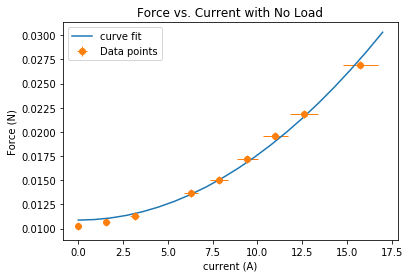

In [8]:
mg0_fitted_x = np.linspace(0, 17, 20)
mg0_fitted_y = quadratic_model(mg0_fitted_x, mg0_a, mg0_b)

plt.plot(mg0_fitted_x, mg0_fitted_y, label='curve fit')
plt.errorbar(current_0mg, actual_deflection_0mg, xerr=u_current_0mg, yerr=u_actual_deflection_0mg, ls='', marker='o', lw=1, label="Data points")
plt.xlabel('current (A)')
plt.ylabel('Force (N)')
plt.title('Force vs. Current with No Load')
plt.legend()

# Different Loads

In [9]:
# Reading data for the experiments with 5mg, 20mg, 40mg, and 50mg load
deflection_5mg, voltage_5mg = np.loadtxt('deflection_voltage_5mg.txt', skiprows=1, unpack=True)
deflection_20mg, voltage_20mg = np.loadtxt('deflection_voltage_20mg.txt', skiprows=1, unpack=True)
deflection_40mg, voltage_40mg = np.loadtxt('deflection_voltage_40mg.txt', skiprows=1, unpack=True)
deflection_50mg, voltage_50mg = np.loadtxt('deflection_voltage_50mg.txt', skiprows=1, unpack=True)

#convert deflection to SI units meters
deflection_5mg = deflection_5mg / 100
deflection_20mg = deflection_20mg / 100
deflection_40mg = deflection_40mg / 100
deflection_50mg = deflection_50mg / 100

#calculate actual deflection, see method used in report
sin_deflection_angle_5mg = deflection_5mg / l
actual_deflection_5mg = sin_deflection_angle_5mg * d_mirror_wire
sin_deflection_angle_20mg = deflection_20mg / l
actual_deflection_20mg = sin_deflection_angle_20mg * d_mirror_wire
sin_deflection_angle_40mg = deflection_40mg / l
actual_deflection_40mg = sin_deflection_angle_40mg * d_mirror_wire
sin_deflection_angle_50mg = deflection_50mg / l
actual_deflection_50mg = sin_deflection_angle_50mg * d_mirror_wire

#error propagation, treating sin(theta) as theta for small angle approximation
u_actual_deflection_5mg = np.abs(actual_deflection_5mg) * np.sqrt(\
                                                                  (u_deflection / deflection_5mg)**2 + \
                                                                  (u_l / l)**2 + (u_d_mirror_wire / d_mirror_wire)**2)
u_actual_deflection_20mg = np.abs(actual_deflection_20mg) * np.sqrt(\
                                                                  (u_deflection / deflection_20mg)**2 + \
                                                                  (u_l / l)**2 + (u_d_mirror_wire / d_mirror_wire)**2)
u_actual_deflection_40mg = np.abs(actual_deflection_40mg) * np.sqrt(\
                                                                  (u_deflection / deflection_40mg)**2 + \
                                                                  (u_l / l)**2 + (u_d_mirror_wire / d_mirror_wire)**2)
u_actual_deflection_50mg = np.abs(actual_deflection_50mg) * np.sqrt(\
                                                                  (u_deflection / deflection_50mg)**2 + \
                                                                  (u_l / l)**2 + (u_d_mirror_wire / d_mirror_wire)**2)

u_actual_delfection_5mg = np.sqrt((u_actual_deflection_5mg)**2 + (u_d_wire_offset)**2)
u_actual_delfection_20mg = np.sqrt((u_actual_deflection_20mg)**2 + (u_d_wire_offset)**2)
u_actual_delfection_40mg = np.sqrt((u_actual_deflection_40mg)**2 + (u_d_wire_offset)**2)
u_actual_delfection_50mg = np.sqrt((u_actual_deflection_50mg)**2 + (u_d_wire_offset)**2)

actual_deflection_5mg += d_wire_offset
actual_deflection_20mg += d_wire_offset
actual_deflection_40mg += d_wire_offset
actual_deflection_50mg += d_wire_offset

In [10]:
# Convert from voltage to current given 16.5 ohm resistance
current_5mg = voltage_5mg * calibration_constant
current_20mg = voltage_20mg * calibration_constant
current_40mg = voltage_40mg * calibration_constant
current_50mg = voltage_50mg * calibration_constant

# Calculate current uncertainty
u_current_5mg = current_5mg[1:] * np.sqrt((u_voltage / voltage_5mg[1:])**2 + (u_calibration_constant / calibration_constant)**2)
u_current_5mg = np.insert(u_current_5mg, 0, 0)
u_current_20mg = current_20mg[1:] * np.sqrt((u_voltage / voltage_20mg[1:])**2 + (u_calibration_constant / calibration_constant)**2)
u_current_20mg = np.insert(u_current_20mg, 0, 0)
u_current_40mg = current_40mg[1:] * np.sqrt((u_voltage / voltage_40mg[1:])**2 + (u_calibration_constant / calibration_constant)**2)
u_current_40mg = np.insert(u_current_40mg, 0, 0)
u_current_50mg = current_50mg[1:] * np.sqrt((u_voltage / voltage_50mg[1:])**2 + (u_calibration_constant / calibration_constant)**2)
u_current_50mg = np.insert(u_current_50mg, 0, 0)

In [11]:
mg5_p_opt, mg5_p_cov = curve_fit(quadratic_model, current_5mg[1:], actual_deflection_5mg[1:], 
                                 sigma=u_actual_deflection_5mg[1:], absolute_sigma=True)

mg5_a = mg5_p_opt[0]
mg5_b = mg5_p_opt[1]
mg5_pvar = np.diag(mg5_p_cov)
mg5_stdev = np.sqrt(mg5_pvar)

print('Modeling with a quadratic equation for the 5mg load, F =', mg5_a, 'I^2 +', mg5_b, 'N')


mg20_p_opt, mg20_p_cov = curve_fit(quadratic_model, current_20mg[1:], actual_deflection_20mg[1:], 
                                   sigma=u_actual_deflection_20mg[1:], absolute_sigma=True)

mg20_a = mg20_p_opt[0]
mg20_b = mg20_p_opt[1]
mg20_pvar = np.diag(mg20_p_cov)
mg20_stdev = np.sqrt(mg20_pvar)

print('Modeling with a quadratic equation for the 20mg load, F =', mg20_a, 'I^2 +', mg20_b, 'N')


mg40_p_opt, mg40_p_cov = curve_fit(quadratic_model, current_40mg[1:], actual_deflection_40mg[1:], 
                                   sigma=u_actual_deflection_40mg[1:], absolute_sigma=True)

mg40_a = mg40_p_opt[0]
mg40_b = mg40_p_opt[1]
mg40_pvar = np.diag(mg40_p_cov)
mg40_stdev = np.sqrt(mg40_pvar)

print('Modeling with a quadratic equation for the 40mg load, F =', mg40_a, 'I^2 +', mg40_b, 'N')


mg50_p_opt, mg50_p_cov = curve_fit(quadratic_model, current_50mg[1:], actual_deflection_50mg[1:], 
                                   sigma=u_actual_deflection_50mg[1:], absolute_sigma=True)

mg50_a = mg50_p_opt[0]
mg50_b = mg50_p_opt[1]
mg50_pvar = np.diag(mg50_p_cov)
mg50_stdev = np.sqrt(mg50_pvar)

print('Modeling with a quadratic equation for the 50mg load, F =', mg50_a, 'I^2 +', mg50_b, 'N')

Modeling with a quadratic equation for the 5mg load, F = 7.124327860634452e-05 I^2 + 0.01024986376691122 N
Modeling with a quadratic equation for the 20mg load, F = 6.820335801155043e-05 I^2 + 0.008361321042445885 N
Modeling with a quadratic equation for the 40mg load, F = 6.508597433584029e-05 I^2 + 0.007891591251585698 N
Modeling with a quadratic equation for the 50mg load, F = 6.802345717115354e-05 I^2 + 0.006188601031092703 N


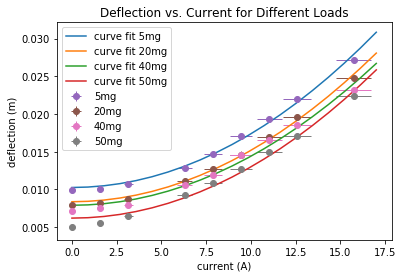

In [12]:
fitted_x = np.linspace(0, 17, 20)
mg5_fitted_y = quadratic_model(fitted_x, mg5_a, mg5_b)
mg20_fitted_y = quadratic_model(fitted_x, mg20_a, mg20_b)
mg40_fitted_y = quadratic_model(fitted_x, mg40_a, mg40_b)
mg50_fitted_y = quadratic_model(fitted_x, mg50_a, mg50_b)

plt.plot(fitted_x, mg5_fitted_y, label='curve fit 5mg')
plt.plot(fitted_x, mg20_fitted_y, label='curve fit 20mg')
plt.plot(fitted_x, mg40_fitted_y, label='curve fit 40mg')
plt.plot(fitted_x, mg50_fitted_y, label='curve fit 50mg')
plt.errorbar(current_5mg, actual_deflection_5mg, xerr=u_current_5mg, yerr=u_actual_deflection_5mg, ls='', marker='o', lw=1, label="5mg")
plt.errorbar(current_20mg, actual_deflection_20mg, xerr=u_current_20mg, yerr=u_actual_deflection_20mg, ls='', marker='o', lw=1, label="20mg")
plt.errorbar(current_40mg, actual_deflection_40mg, xerr=u_current_40mg, yerr=u_actual_deflection_40mg, ls='', marker='o', lw=1, label="40mg")
plt.errorbar(current_50mg, actual_deflection_50mg, xerr=u_current_50mg, yerr=u_actual_deflection_50mg, ls='', marker='o', lw=1, label="50mg")
plt.xlabel('current (A)')
plt.ylabel('deflection (m)')
plt.title('Deflection vs. Current for Different Loads')
plt.legend()

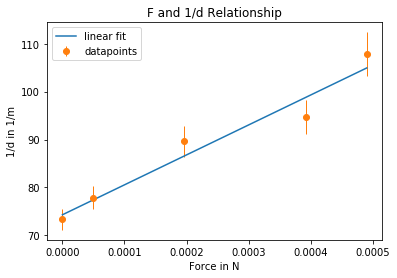

In [13]:
# checking accuracy of relationship F ~ 1/d, picking an arbitrary deflection current
force_arr = np.array([0, 5, 20, 40, 50]) * 9.81 * 10**(-6) # convert to N
d_arr = np.array([actual_deflection_0mg[3], actual_deflection_5mg[3],actual_deflection_20mg[3], actual_deflection_40mg[3], actual_deflection_50mg[3]])
# uncertainty of 1/d is given by d^(-2) * u_d
u_d_arr = d_arr ** (-2) * np.array(np.array([u_actual_deflection_0mg[3], u_actual_deflection_5mg[3], u_actual_deflection_20mg[3], 
                                             u_actual_deflection_40mg[3], u_actual_deflection_50mg[3]]))


fd_p_opt, fd_p_cov = curve_fit(linear_model, force_arr, 1/d_arr, 
                               sigma=u_d_arr, absolute_sigma=True)

fd_a = fd_p_opt[0]
fd_b = fd_p_opt[1]

fd_fitted_y = linear_model(force_arr, fd_a, fd_b)

plt.plot(force_arr, fd_fitted_y, label='linear fit')
plt.errorbar(force_arr, 1/d_arr, yerr=u_d_arr, ls='', marker='o', lw=1, label='datapoints')
plt.title('F and 1/d Relationship')
plt.xlabel('Force in N')
plt.ylabel('1/d in 1/m')
plt.legend()

# Constant Deflection

Modeling with a quadratic equation for force versus current, F = 7.755616711707031e-06 I - 4.248075507564921e-06 N


Text(0.5,1,'Force Needed vs. Current for Constant Deflection')

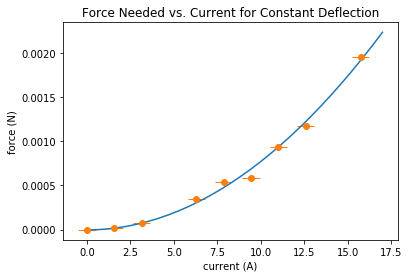

In [14]:
# Read raw data from file
mass_balance, voltage_balance = np.loadtxt('constant_deflection.txt', skiprows=1, unpack=True)

#calculate current
current_balance = voltage_balance * calibration_constant
u_current_balance = current_balance[1:] * np.sqrt((u_voltage / voltage_balance[1:])**2 + (u_calibration_constant / calibration_constant)**2)
u_current_balance = np.insert(u_current_balance, 0, 0)

g = 9.81 # assuming no uncertainty in the acceleration due to gravity
length_of_wire = 0.265

# Convert mass to force
mass_balance = mass_balance / (10**6) # convert mg to kg
force_balance = mass_balance * g

# ignore the covariance since we are assuming 0 uncertainties in F
b_p_opt, _ = curve_fit(quadratic_model, current_balance[1:], force_balance[1:], absolute_sigma=True)

b_a = b_p_opt[0]
b_b = b_p_opt[1]

print('Modeling with a quadratic equation for force versus current, F =', b_a, 'I -', -b_b, 'N')

b_fitted_x = np.linspace(0, 17, 30)
b_fitted_y = quadratic_model(b_fitted_x, b_a, b_b)

plt.plot(b_fitted_x, b_fitted_y, label='curve fit 5mg')
plt.errorbar(current_balance, force_balance, xerr=u_voltage, ls='', marker='o', lw=1)
plt.xlabel('current (A)')
plt.ylabel('force (N)')
plt.title('Force Needed vs. Current for Constant Deflection')

In [15]:
# Curve fit the F/l against I^2 relationship
f_over_l = force_balance / length_of_wire
u_f_over_l = np.abs(f_over_l) * np.sqrt((u_l / l)**2)
i_squared = current_balance ** 2
u_i_squared = 2 * current_balance * u_current_balance

# Since the first datapoint has 0 uncertainty, we will omit it when dealing with covariance
f_over_l_i2_p_opt, f_over_l_i2_p_cov = curve_fit(linear_model, i_squared[1:], f_over_l[1:],\
                                       sigma=u_f_over_l[1:], absolute_sigma=True)

f_over_l_i2_a = f_over_l_i2_p_opt[0]
f_over_l_i2_b = f_over_l_i2_p_opt[1]
f_over_l_i2_pvar = np.diag(f_over_l_i2_p_cov)
f_over_l_i2_stdev = np.sqrt(f_over_l_i2_pvar)

The slope of the fitted curve is 2.8578899954811556e-05 ± 5.7888103070830574e-08
Hence the μ0 value calculates to be 1.2569656700399912e-06 ± 1.8136255015256387e-08 T*m/A


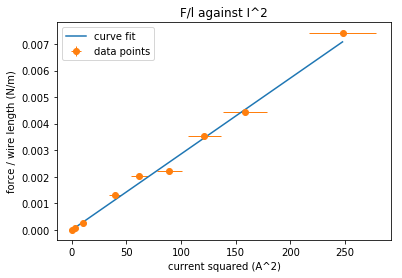

In [16]:
# Plotting F/l against I^2
f_over_l_i2_fitted_y = linear_model(i_squared, f_over_l_i2_a, f_over_l_i2_b)

plt.plot(i_squared, f_over_l_i2_fitted_y, label='curve fit')
plt.errorbar(i_squared, f_over_l, xerr=u_i_squared, yerr=u_f_over_l, ls='', marker='o', lw=1, label='data points')
plt.xlabel('current squared (A^2)')
plt.ylabel('force / wire length (N/m)')
plt.title('F/l against I^2')
plt.legend()

print('The slope of the fitted curve is', f_over_l_i2_a, '±', f_over_l_i2_stdev[0])

# calculate mu_0 and its uncertainty
mu_0 = f_over_l_i2_a * 2 * np.pi * d_wire_offset # we took the wire offset as the constant level point
u_mu_0 = mu_0 * np.sqrt((f_over_l_i2_stdev[0] / f_over_l_i2_a)**2 + (u_d_wire_offset / d_wire_offset)**2)
print('Hence the μ0 value calculates to be', mu_0, '±', u_mu_0, 'T*m/A')

In [17]:
# goodness of fit
upper_n = len(f_over_l) - 1 # number of datapoints taken, subtract the 0 point
lower_n = 2
degrees_of_freedom = upper_n - lower_n

# ommiting the first point in the data
chi_squared = (1 / degrees_of_freedom) * sum(((f_over_l[1: degrees_of_freedom + 1] - f_over_l_i2_fitted_y[1: degrees_of_freedom + 1])\
                                            / u_f_over_l[1: degrees_of_freedom + 1])**2)

print('The chi squared value we got is', chi_squared)

The chi squared value we got is 440.56085520136423


In [18]:
# Calculating chi squared with more reasonable uncertainties in the force
# ommit the first data point to avoid dividing by 0 error
u_f_1p = (force_balance[1:] * 0.01 / force_balance[1:])**2
u_f_1p = np.insert(u_f_1p, 0, 0)
u_f_2p = (force_balance[1:] * 0.02 / force_balance[1:])**2
u_f_2p = np.insert(u_f_2p, 0, 0)
u_f_3p = (force_balance[1:] * 0.03 / force_balance[1:])**2
u_f_3p = np.insert(u_f_3p, 0, 0)
u_f_over_l_1p = np.abs(f_over_l) * np.sqrt(u_f_1p + (u_l / l)**2)
u_f_over_l_2p = np.abs(f_over_l) * np.sqrt(u_f_2p + (u_l / l)**2)
u_f_over_l_3p = np.abs(f_over_l) * np.sqrt(u_f_3p + (u_l / l)**2)

chi_squared_1p = (1 / degrees_of_freedom) * sum(((f_over_l[1: degrees_of_freedom + 1] - f_over_l_i2_fitted_y[1: degrees_of_freedom + 1])\
                                            / u_f_1p[1: degrees_of_freedom + 1])**2)
chi_squared_2p = (1 / degrees_of_freedom) * sum(((f_over_l[1: degrees_of_freedom + 1] - f_over_l_i2_fitted_y[1: degrees_of_freedom + 1])\
                                            / u_f_2p[1: degrees_of_freedom + 1])**2)
chi_squared_3p = (1 / degrees_of_freedom) * sum(((f_over_l[1: degrees_of_freedom + 1] - f_over_l_i2_fitted_y[1: degrees_of_freedom + 1])\
                                            / u_f_3p[1: degrees_of_freedom + 1])**2)

print('The chi squared value we got assuming 1% uncertainty in force is', chi_squared_1p)
print('The chi squared value we got assuming 2% uncertainty in force is', chi_squared_2p)
print('The chi squared value we got assuming 3% uncertainty in force is', chi_squared_3p)

The chi squared value we got assuming 1% uncertainty in force is 3.4510578366387152
The chi squared value we got assuming 2% uncertainty in force is 0.2156911147899197
The chi squared value we got assuming 3% uncertainty in force is 0.04260565230418168
